<a href="https://colab.research.google.com/github/Faheemfemu/Email-Campaign-Effectiveness-Prediction-classification/blob/main/Email_Campaign_Effectiveness_Prediction_faheem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Email Campaign Effectiveness Prediction**


##### **Project Type**    - Supervise ML Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [2]:
# Load Dataset
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path="/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Supervised ML - Classification/data_email_campaign.csv"
email_data=pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
email_data.shape

(68353, 12)

### Dataset Information

In [6]:
# Dataset Info
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
email_data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [9]:
# Missing Value Count Function
def showMissing():
    missing = email_data.columns[email_data.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = email_data[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = email_data[showMissing()].isnull().sum().sort_values(ascending = False)/len(email_data)*100

missingVal
     

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.963411
Total_Past_Communications,6825,9.984931
Total_Links,2201,3.220049
Total_Images,1677,2.453440


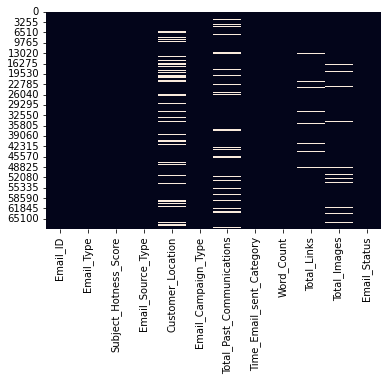

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_data.isnull(),cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 observation and 12 features.


* Dataset is a mixture of integer, float and object data type.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location (11595 i.e., 16.9%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3,2%), total images (1677 i.e., 2.4%) has null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [12]:
# Dataset Describe
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

 * **Email_Id** - Email id of customer
 * **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
 * **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
 * **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
 * **Email_Campaign_Type** - The campaign type of the email.
 * **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
 * **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
 * **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
 * **Word_Count**- Total count of word in each email
 * **Total_links** - Total number of links in the email
 * **Total_Images** - Total Number of images in the email
 * **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in email_data.columns:
  print("No. of unique values in '{}' is {}.".format(i, email_data[i].nunique()))
     

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Checking Shape of Email Read
print("No. of Email Read : ",len(email_data[email_data['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : ",len(email_data[email_data['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : ",len(email_data[email_data['Email_Status'] == 0]))

No. of Email Read :  11039
No. of Email Acknowledged :  2373
No. of Email Ignored :  54941


In [16]:
# Email Status groupby Email_Type
pd.DataFrame(email_data.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [17]:
# Email Status groupby Email_Source_Type
pd.DataFrame(email_data.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))
     

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [20]:
# Email Status groupby Customer_Location
pd.DataFrame(email_data.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [21]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(email_data.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [23]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(email_data.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [28]:
#creating variable to store numerical feature
num_feature = email_data.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature
#word_count have numeric data
     

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [30]:
#creating variable to store categorial features
cat_feature = [feature for feature in email_data.columns.to_list() if feature not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [36]:
#finding count, sum, mean and median based on Email Type
email_data.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                   1             2
Subject_Hotness_Score     count   4.886600e+04  1.948700e+04
                          sum     6.078070e+04  1.409870e+04
                          mean    1.243824e+00  7.234926e-01
                          median  1.100000e+00  3.000000e-01
Total_Past_Communications count   4.406500e+04  1.746300e+04
                          sum     1.291275e+06  4.889300e+05
                          mean    2.930387e+01  2.799805e+01
                          median  2.900000e+01  2.800000e+01
Total_Links               count   4.728600e+04  1.886600e+04
                          sum     5.241490e+05  1.657850e+05
                          mean    1.108466e+01  8.787501e+00
                          median  9.000000e+00  8.000000e+00
Total_Images              count   4.765500e+04  1.902100e+04
                          sum     1.875460e+05  4.919900e+04
                          mean    3.935495e+00  2.586562e+00
                          median  1.000000e+00  0.000000e+00
Word_Count                count   4.886600e+04  1.948700e+04
                          sum     3.354937e+07  1.429306e+07
                          mean    6.865586e+02  7.334665e+02
                          median  6.780000e+02  7.220000e+02

In [37]:
#finding count, sum, mean and median based on Email_Source_Type
email_data.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T
     

Email_Source_Type                            1             2
Subject_Hotness_Score     count   3.714900e+04  3.120400e+04
                          sum     4.048740e+04  3.439200e+04
                          mean    1.089865e+00  1.102166e+00
                          median  8.000000e-01  8.000000e-01
Total_Past_Communications count   3.335300e+04  2.817500e+04
                          sum     9.918520e+05  7.883530e+05
                          mean    2.973801e+01  2.798059e+01
                          median  3.000000e+01  2.700000e+01
Total_Links               count   3.595000e+04  3.020200e+04
                          sum     3.628040e+05  3.271300e+05
                          mean    1.009191e+01  1.083140e+01
                          median  9.000000e+00  9.000000e+00
Total_Images              count   3.624400e+04  3.043200e+04
                          sum     1.214220e+05  1.153230e+05
                          mean    3.350127e+00  3.789531e+00
                          median  0.000000e+00  0.000000e+00
Word_Count                count   3.714900e+04  3.120400e+04
                          sum     2.555477e+07  2.228767e+07
                          mean    6.878992e+02  7.142568e+02
                          median  6.840000e+02  7.040000e+02

In [38]:
#finding count, sum, mean and median based on Customer_Location
email_data.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                            A             B             C  \
Subject_Hotness_Score     count   1.454000e+03  4.341000e+03  5.758000e+03   
                          sum     1.644400e+03  4.847900e+03  6.351100e+03   
                          mean    1.130949e+00  1.116770e+00  1.103005e+00   
                          median  9.000000e-01  9.000000e-01  8.000000e-01   
Total_Past_Communications count   1.300000e+03  3.939000e+03  5.183000e+03   
                          sum     3.697000e+04  1.134620e+05  1.495720e+05   
                          mean    2.843846e+01  2.880477e+01  2.885819e+01   
                          median  2.700000e+01  2.800000e+01  2.800000e+01   
Total_Links               count   1.407000e+03  4.205000e+03  5.573000e+03   
                          sum     1.458700e+04  4.397900e+04  5.869700e+04   
                          mean    1.036745e+01  1.045874e+01  1.053239e+01   
                          median  9.000000e+00  9.000000e+00  9.000000e+00   
Total_Images              count   1.416000e+03  4.236000e+03  5.606000e+03   
                          sum     4.795000e+03  1.543400e+04  2.020200e+04   
                          mean    3.386299e+00  3.643532e+00  3.603639e+00   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
Word_Count                count   1.454000e+03  4.341000e+03  5.758000e+03   
                          sum     1.004166e+06  3.045906e+06  4.053360e+06   
                          mean    6.906231e+02  7.016600e+02  7.039528e+02   
                          median  6.940000e+02  6.940000e+02  6.940000e+02   

Customer_Location                            D             E             F  \
Subject_Hotness_Score     count   7.406000e+03  1.019300e+04  4.433000e+03   
                          sum     8.187800e+03  1.111640e+04  4.794400e+03   
                          mean    1.105563e+00  1.090592e+00  1.081525e+00   
                          median  8.000000e-01  8.000000e-01  8.000000e-01   
Total_Past_Communications count   6.625000e+03  9.170000e+03  3.980000e+03   
                          sum     1.902230e+05  2.671770e+05  1.150360e+05   
                          mean    2.871291e+01  2.913599e+01  2.890352e+01   
                          median  2.800000e+01  2.900000e+01  2.800000e+01   
Total_Links               count   7.157000e+03  9.872000e+03  4.311000e+03   
                          sum     7.454800e+04  1.020920e+05  4.563100e+04   
                          mean    1.041610e+01  1.034157e+01  1.058478e+01   
                          median  9.000000e+00  9.000000e+00  9.000000e+00   
Total_Images              count   7.244000e+03  9.938000e+03  4.319000e+03   
                          sum     2.547100e+04  3.481300e+04  1.594900e+04   
                          mean    3.516151e+00  3.503019e+00  3.692753e+00   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
Word_Count                count   7.406000e+03  1.019300e+04  4.433000e+03   
                          sum     5.183849e+06  7.128244e+06  3.099054e+06   
                          mean    6.999526e+02  6.993274e+02  6.990873e+02   
                          median  6.940000e+02  6.940000e+02  6.940000e+02   

Customer_Location                            G  
Subject_Hotness_Score     count   2.317300e+04  
                          sum     2.524040e+04  
                          mean    1.089216e+00  
                          median  8.000000e-01  
Total_Past_Communications count   2.091800e+04  
                          sum     6.057270e+05  
                          mean    2.895721e+01  
                          median  2.900000e+01  
Total_Links               count   2.242900e+04  
                          sum     2.332460e+05  
                          mean    1.039930e+01  
                          median  9.000000e+00  
Total_Images              count   2.261400e+04  
                          sum     7.

In [40]:
#finding count, sum, mean and median based on Email_Campaign_Type
email_data.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T
     

Email_Campaign_Type                           1             2             3
Subject_Hotness_Score     count      736.000000  4.827300e+04  1.934400e+04
                          sum        111.700000  7.186960e+04  2.898100e+03
                          mean         0.151766  1.488816e+00  1.498191e-01
                          median       0.200000  1.400000e+00  1.000000e-01
Total_Past_Communications count      657.000000  4.347500e+04  1.739600e+04
                          sum          0.000000  1.165934e+06  6.142710e+05
                          mean         0.000000  2.681849e+01  3.531105e+01
                          median       0.000000  2.600000e+01  3.600000e+01
Total_Links               count      706.000000  4.672700e+04  1.871900e+04
                          sum        706.000000  4.997010e+05  1.895270e+05
                          mean         1.000000  1.069405e+01  1.012485e+01
                          median       1.000000  9.000000e+00  9.000000e+00
Total_Images              count      722.000000  4.710600e+04  1.884800e+04
                          sum          0.000000  1.738800e+05  6.286500e+04
                          mean         0.000000  3.691250e+00  3.335367e+00
                          median       0.000000  0.000000e+00  0.000000e+00
Word_Count                count      736.000000  4.827300e+04  1.934400e+04
                          sum     482278.000000  3.330046e+07  1.405970e+07
                          mean       655.269022  6.898360e+02  7.268250e+02
                          median     662.000000  6.840000e+02  7.210000e+02

In [41]:
#finding count, sum, mean and median based on Time_Email_sent_Category
email_data.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                     1             2             3
Subject_Hotness_Score     count   1.363600e+04  4.112900e+04  1.358800e+04
                          sum     1.518700e+04  4.471570e+04  1.497670e+04
                          mean    1.113743e+00  1.087206e+00  1.102200e+00
                          median  9.000000e-01  8.000000e-01  8.000000e-01
Total_Past_Communications count   1.224400e+04  3.704600e+04  1.223800e+04
                          sum     3.533750e+05  1.074034e+06  3.527960e+05
                          mean    2.886107e+01  2.899190e+01  2.882791e+01
                          median  2.800000e+01  2.800000e+01  2.800000e+01
Total_Links               count   1.319100e+04  3.979800e+04  1.316300e+04
                          sum     1.384270e+05  4.139040e+05  1.376030e+05
                          mean    1.049405e+01  1.040012e+01  1.045377e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
Total_Images              count   1.330600e+04  4.011800e+04  1.325200e+04
                          sum     4.736100e+04  1.421880e+05  4.719600e+04
                          mean    3.559372e+00  3.544244e+00  3.561425e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
Word_Count                count   1.363600e+04  4.112900e+04  1.358800e+04
                          sum     9.522852e+06  2.883628e+07  9.483300e+06
                          mean    6.983611e+02  7.011180e+02  6.979173e+02
                          median  6.940000e+02  6.940000e+02  6.940000e+02

In [42]:
#Analyzing mean median and sum based on Email status with respect to numerical features
email_data.groupby('Email_Status')[num_feature].agg(['sum','mean','median']).T

Email_Status                                 0             1             2
Subject_Hotness_Score     sum     6.370730e+04  1.001810e+04  1.154000e+03
                          mean    1.159558e+00  9.075188e-01  4.863043e-01
                          median  1.000000e+00  3.000000e-01  2.000000e-01
Total_Past_Communications sum     1.355183e+06  3.452040e+05  7.981800e+04
                          mean    2.740013e+01  3.470782e+01  3.759680e+01
                          median  2.600000e+01  3.600000e+01  4.000000e+01
Total_Links               sum     5.606030e+05  1.052940e+05  2.403700e+04
                          mean    1.054320e+01  9.854375e+00  1.047364e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
Total_Images              sum     1.939020e+05  3.429600e+04  8.547000e+03
                          mean    3.617575e+00  3.187361e+00  3.690415e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
Word_Count                sum     3.984633e+07  6.523382e+06  1.472720e+06
                          mean    7.252568e+02  5.909396e+02  6.206153e+02
                          median  7.130000e+02  5.780000e+02  6.100000e+02

In [46]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(email_data[email_data['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)
     

Email Acknowledged based on Email_Type 

Email_Type                                    1              2
Subject_Hotness_Score     sum        984.700000     169.300000
                          mean         0.595345       0.235466
                          median       0.300000       0.200000
Total_Past_Communications sum      59238.000000   20580.000000
                          mean        40.079838      31.906977
                          median      41.000000      36.000000
Total_Links               sum      17978.000000    6059.000000
                          mean        11.222222       8.743146
                          median      11.000000       8.000000
Total_Images              sum       6612.000000    1935.000000
                          mean         4.086527       2.772206
                          median       1.000000       0.000000
Word_Count                sum     990293.000000  482427.000000
                          mean       598.726119     670.969402
              

In [51]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(email_data[email_data['Email_Status']==1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)

Email Opened based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     8.861200e+03  1.156900e+03
                          mean    1.079581e+00  4.086542e-01
                          median  7.000000e-01  2.000000e-01
Total_Past_Communications sum     2.612080e+05  8.399600e+04
                          mean    3.531747e+01  3.293961e+01
                          median  3.600000e+01  3.500000e+01
Total_Links               sum     8.327300e+04  2.202100e+04
                          mean    1.047591e+01  8.048611e+00
                          median  9.000000e+00  8.000000e+00
Total_Images              sum     2.843300e+04  5.863000e+03
                          mean    3.551461e+00  2.128903e+00
                          median  0.000000e+00  0.000000e+00
Word_Count                sum     4.697752e+06  1.825630e+06
                          mean    5.723382e+02  6.448711e+02
                          median  5.650000e+02  6.

In [52]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(email_data[email_data['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)

Email Ignored based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     5.093480e+04  1.277250e+04
                          mean    1.305887e+00  8.014369e-01
                          median  1.200000e+00  4.000000e-01
Total_Past_Communications sum     9.708290e+05  3.843540e+05
                          mean    2.758742e+01  2.693818e+01
                          median  2.600000e+01  2.600000e+01
Total_Links               sum     4.228980e+05  1.377050e+05
                          mean    1.120705e+01  8.920451e+00
                          median  1.000000e+01  8.000000e+00
Total_Images              sum     1.525010e+05  4.140100e+04
                          mean    4.009913e+00  2.659195e+00
                          median  1.000000e+00  0.000000e+00
Word_Count                sum     2.786133e+07  1.198500e+07
                          mean    7.143198e+02  7.520239e+02
                          median  7.000000e+02  7

In [54]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = email_data[email_data['Email_Status'] == 2]['Email_Status'].count()/len(email_data)*100
engagement_rate
     

3.4716837593082963

In [56]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = email_data[email_data['Email_Status'] != 0]['Email_Status'].count()/len(email_data)*100
open_rate

19.62166986086931

In [57]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = email_data[email_data['Email_Status'] == 0]['Email_Status'].count()/len(email_data)*100
ignored_rate

80.3783301391307

In [58]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [61]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(email_data.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(email_data.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(email_data.groupby(cat).apply(Ignore))
    print('='*100)

Engagement Rate for - Email_Type
Email_Type
1    0.033848
2    0.036896
dtype: float64


Open Rate for - Email_Type
Email_Type
1    0.201817
2    0.182173
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1    0.798183
2    0.817827
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1    0.038278
2    0.030477
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1    0.203828
2    0.187155
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1    0.796172
2    0.812845
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A    0.033700
B    0.028795
C    0.037166
D    0.033756
E    0.035711
F    0.035191
G    0.035343
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A    0.202201
B    0.193273
C    0.191733
D    0.196597
E    0.201805
F    0.192646
G    0.196953
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A    0.797799
B    0.806727
C    0.808267
D    0.80

In [62]:
# Link-to-Word ratio
df_Link_to_Word_ratio = email_data['Total_Links'] / email_data['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = email_data['Total_Images'] / email_data['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = email_data['Total_Images'] + email_data['Total_Links'] / email_data['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (email_data['Total_Links'] / email_data['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = email_data['Total_Images'] / email_data['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = email_data['Subject_Hotness_Score'] * email_data['Total_Past_Communications']
     

In [63]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.56208687250181

In [64]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006425172246013729

In [65]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019561519413416703

In [66]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9561519413416701

In [67]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24534715873562615

In [68]:
#Hotness score
df_Hotness_Score.mean()

26.159572877389156

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate.

* No. of Email Read : - 11039 i.e., 17%
* No. of Email Acknowledged : - 2373 i.e., 3%
* No. of Email Ignored : - 54941 i.e., 80%

This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement.


I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.


The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.


Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***